#### Выполнил: Кадырбеков Акан, БЭК151

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
India = pd.read_csv('/Users/akank/Pictures/India.csv')

# Задача 1
## Данные о грамотности мужчин и женщин в Индии
 

In [11]:
India.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

Посмотрим на начало таблицы

In [12]:
India.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


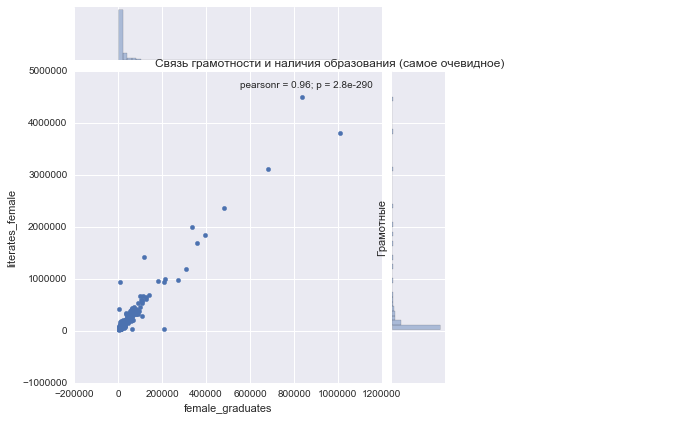

In [33]:
sns.jointplot(data=India, x='female_graduates', y='literates_female')
sns.plt.title('Связь грамотности и наличия образования (самое очевидное)                                                     ')
plt.ylabel('Грамотные')

Видим, что между количеством грамотных женщин и женщин с образованием есть положительная, близкая к 1, корреляция.


Взглянем на некоторые распределения для Индии:

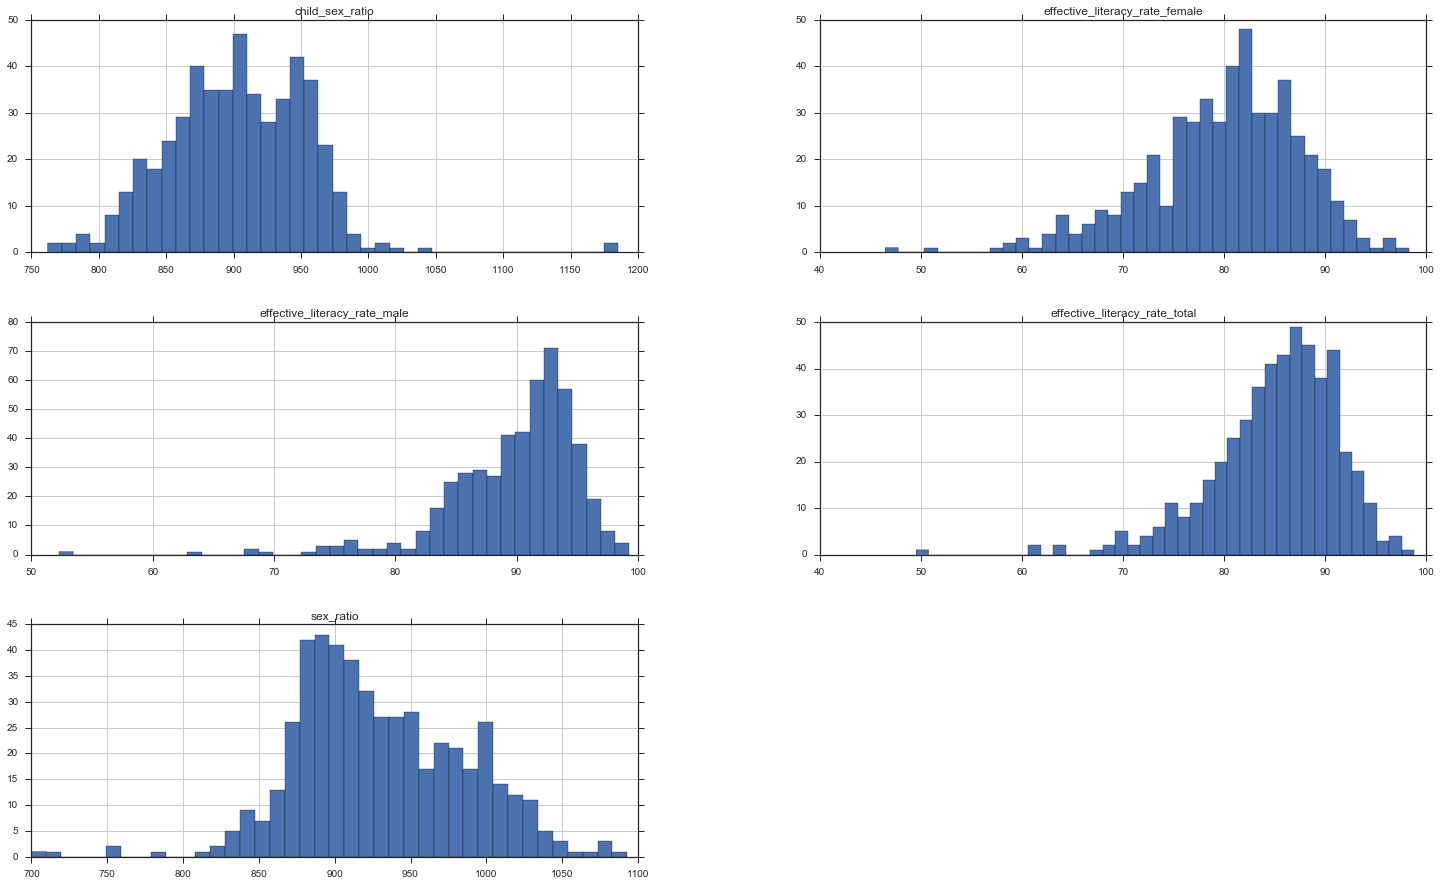

In [138]:
Asia = India[[ 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female', 'sex_ratio',
       'child_sex_ratio']]

Asia.hist(bins=40, figsize=(25,15))
plt.show()

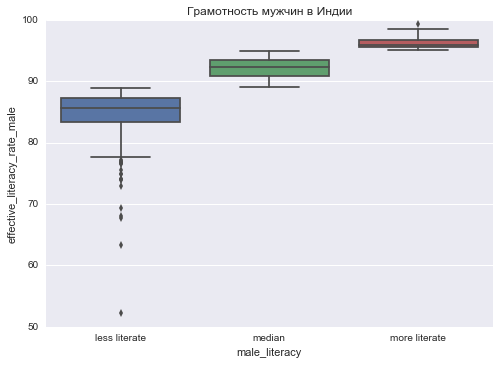

In [36]:
def malelit_category(effective_literacy_rate_male):
    return 'more literate' if effective_literacy_rate_male > 95\
            else 'less literate' if effective_literacy_rate_male < 89 else 'median'

India['male_literacy'] = India['effective_literacy_rate_male'].apply(malelit_category)
sns.boxplot(x='male_literacy', y='effective_literacy_rate_male', data=India);
sns.plt.title('Грамотность мужчин в Индии')

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


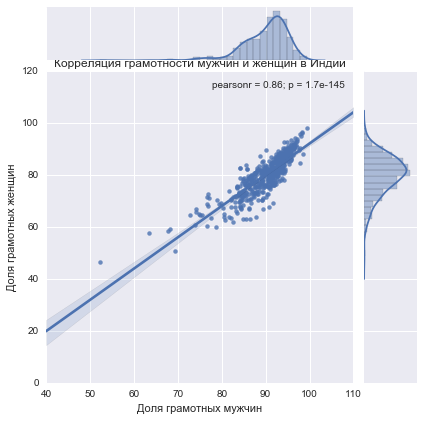

In [37]:
sns.jointplot(x='effective_literacy_rate_male', y='effective_literacy_rate_female', 
              data=India, kind='reg');
sns.plt.title('Корреляция грамотности мужчин и женщин в Индии')
plt.xlabel('Доля грамотных мужчин')
plt.ylabel('Доля грамотных женщин')

### Очень сложные и смешные названия индийских штатов:
#### (Попробуйте  с первого раза выговорить штат под номером 22:))

In [96]:
India.state_name

0              PUNJAB
1         MAHARASHTRA
2      ANDHRA PRADESH
3           JHARKHAND
4      ANDHRA PRADESH
5             TRIPURA
6       UTTAR PRADESH
7             GUJARAT
8         MAHARASHTRA
9             MIZORAM
10          RAJASTHAN
11      UTTAR PRADESH
12        MAHARASHTRA
13         TAMIL NADU
14             KERALA
15      UTTAR PRADESH
16      UTTAR PRADESH
17          RAJASTHAN
18            HARYANA
19            HARYANA
20        MAHARASHTRA
21         TAMIL NADU
22       CHHATTISGARH
23         TAMIL NADU
24        MAHARASHTRA
25            GUJARAT
26             PUNJAB
27      UTTAR PRADESH
28            GUJARAT
29     ANDHRA PRADESH
            ...      
470        TAMIL NADU
471    ANDHRA PRADESH
472        TAMIL NADU
473        TAMIL NADU
474        TAMIL NADU
475       WEST BENGAL
476         RAJASTHAN
477         KARNATAKA
478         RAJASTHAN
479       MAHARASHTRA
480         KARNATAKA
481    MADHYA PRADESH
482       MAHARASHTRA
483       WEST BENGAL
484     UT

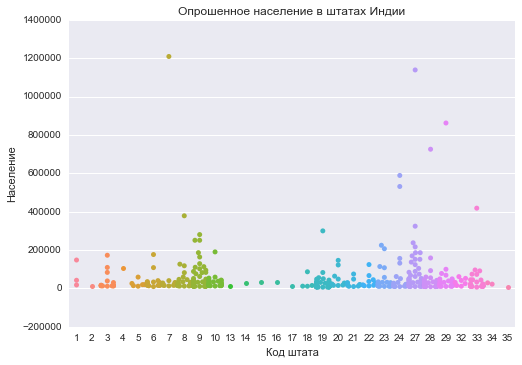

In [38]:
sns.swarmplot(x="state_code", y="0-6_population_total", data=India);
sns.plt.title('Опрошенное население в штатах Индии')
plt.xlabel('Код штата')
plt.ylabel('Население')

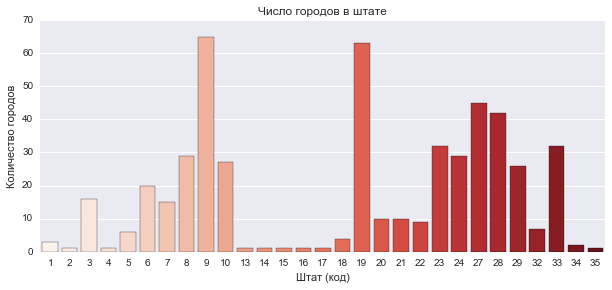

In [5]:
sns.factorplot(x='state_code', data=India, kind="count",
                   palette="Reds", aspect=2.1)
sns.plt.title('Число городов в штате')
plt.xlabel('Штат (код)')
plt.ylabel('Количество городов')

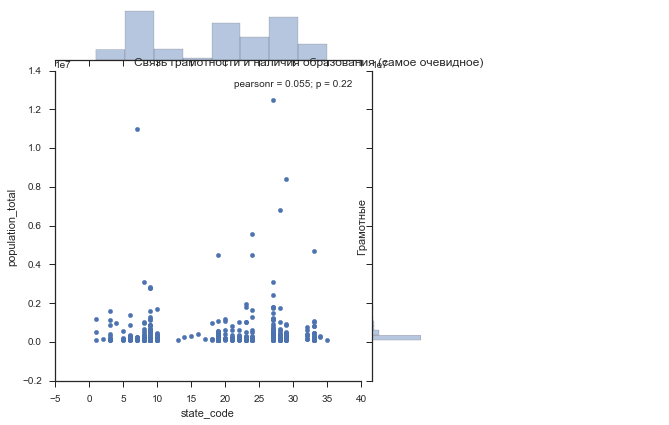

In [142]:
sns.jointplot(data=India, x='state_code', y='population_total')
sns.plt.title('Связь грамотности и наличия образования (самое очевидное)                                                     ')
plt.ylabel('Грамотные')

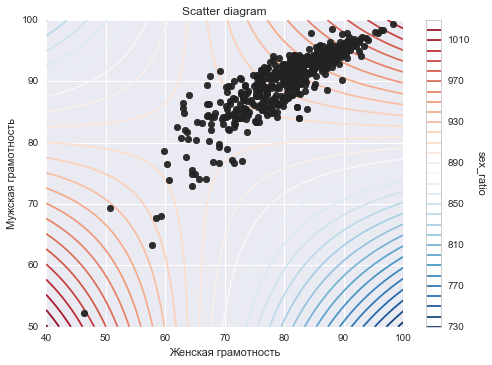

In [150]:
sns.plt.title('Scatter diagram')
sns.set(style="whitegrid")
sns.interactplot(x1='effective_literacy_rate_female', x2='effective_literacy_rate_male', y='sex_ratio', data=India)
plt.xlabel('Женская грамотность')
plt.ylabel('Мужская грамотность')

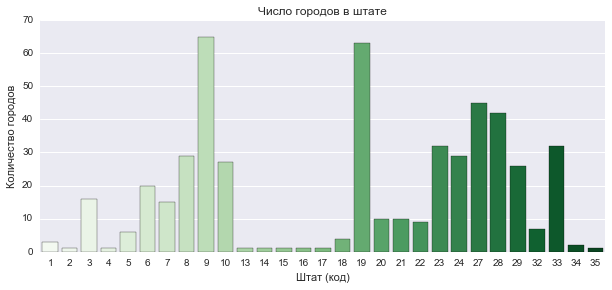

In [6]:
sns.factorplot(x='state_code', data=India, kind="count",
                   palette="Greens", aspect=2.1)
sns.plt.title('Число городов в штате')
plt.xlabel('Штат (код)')
plt.ylabel('Количество городов')

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


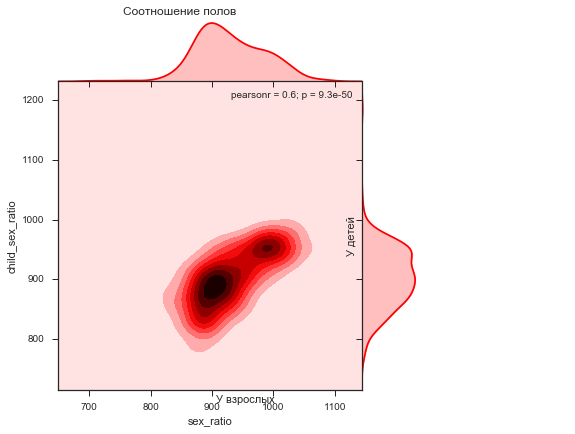

In [62]:
sns.jointplot("sex_ratio", "child_sex_ratio", data=India,
                  kind="kde", space=0, color="r")
sns.plt.title('Соотношение полов', y=1.2, x=-3)
plt.xlabel('У взрослых                                                                                                  ')
plt.ylabel('У детей')

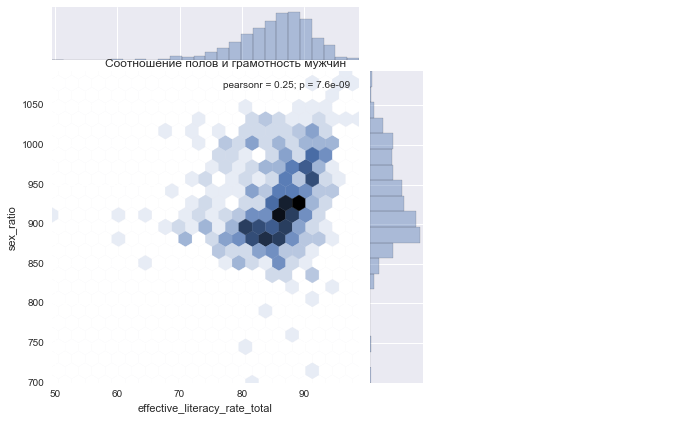

In [46]:
sns.jointplot('effective_literacy_rate_total', 'sex_ratio', data = India, kind="hex") 
sns.plt.title('Соотношение полов и грамотность мужчин                                                                                                     ')

# Задача 2

In [2]:
X1=stats.uniform(loc=0, scale = 1)
X2=stats.uniform(loc=0, scale = 1)
X3=stats.uniform(loc=0, scale = 1)


In [3]:
X1values = X1.rvs(1000)
X2values = X2.rvs(1000)
X3values = X3.rvs(1000)

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


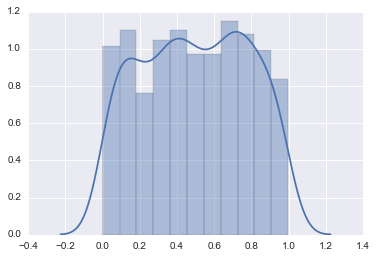

In [4]:
sns.distplot(X1values)

In [5]:
S3 = X1values + X2values + X3values

Распределение для суммы равномерно распределенных случайных величин

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


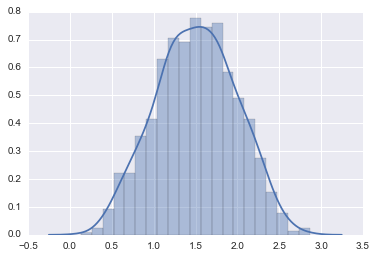

In [6]:
sns.distplot(S3)

In [109]:
X10 = X1.rvs([10,10000])

In [110]:
S10 = np.sum(X10, axis = 0)

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


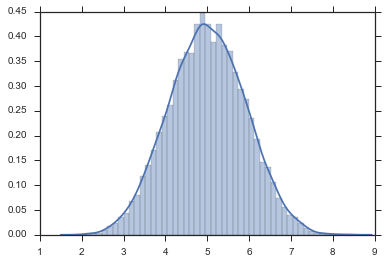

In [111]:
sns.distplot(S10)

In [113]:
X50 = X1.rvs([50,10000])

In [114]:
X50

array([[ 0.57528532,  0.23955074,  0.68244474, ...,  0.98310421,
         0.72428153,  0.52498071],
       [ 0.66831955,  0.55508119,  0.25630324, ...,  0.35114223,
         0.63574096,  0.80558948],
       [ 0.06131293,  0.61786907,  0.71200174, ...,  0.22122836,
         0.10741317,  0.20316543],
       ..., 
       [ 0.64103858,  0.29455819,  0.12081328, ...,  0.62899973,
         0.67618314,  0.92429425],
       [ 0.90047236,  0.96972782,  0.41819195, ...,  0.59715604,
         0.04917366,  0.27196064],
       [ 0.22929105,  0.2528115 ,  0.92360749, ...,  0.83428691,
         0.69724937,  0.11643973]])

In [115]:
S50 = np.sum(X50, axis = 0)

In [116]:
S50

array([ 25.80113823,  25.4829116 ,  29.01412152, ...,  24.62925008,
        23.91473882,  24.64513596])

C:\Users\akank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


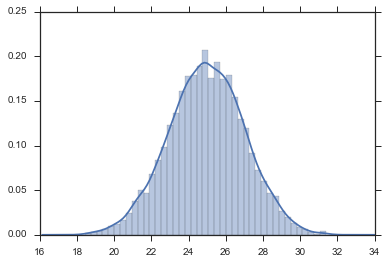

In [117]:
sns.distplot(S50)

Пункт 2

In [ ]:
Y3 = X1values + X2values + X3values

In [120]:
np.sum(S3>2)/10**3

0.16700000000000001

Пункт 3

In [121]:
Y5 = X1values**5

In [122]:
Y5.mean()

0.1578816297398149

In [123]:
Z = X1values/(1+X2values**2)

In [124]:
Z.mean()

0.39184060011325544

In [125]:
Z.var()

0.06028178207735669

Пункт 4

In [126]:
G = (1 + X1values) / (3 + X2values)
np.median(G)

0.4272645051936752

In [127]:
np.percentile(a=G, q=25)

0.3559334492544754

Конец задания 2

# Задача 3
# Monty Hall

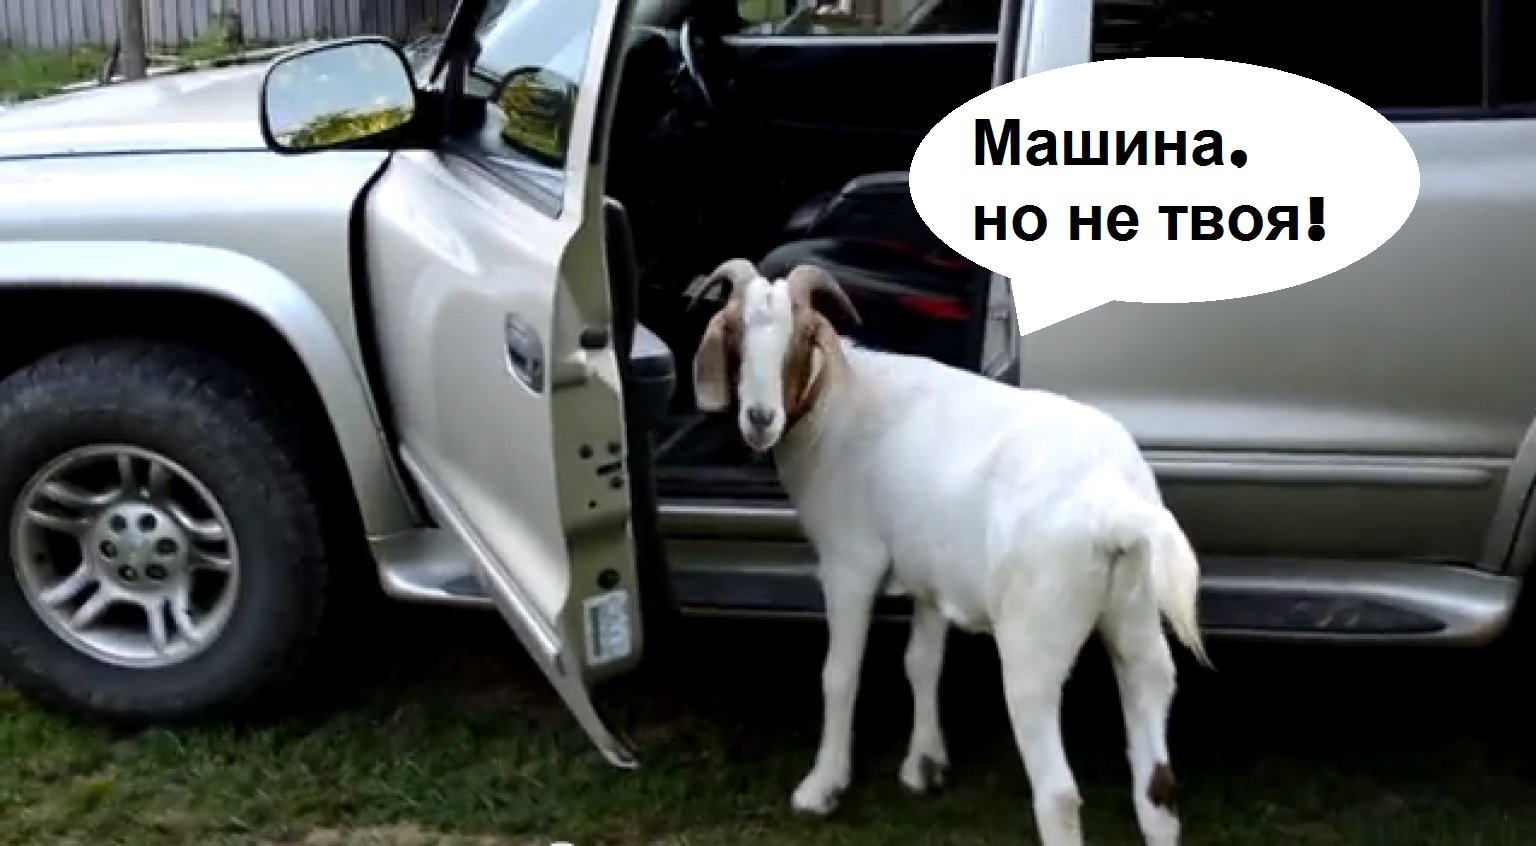

In [134]:
from PIL import Image, ImageDraw
image = Image.open('/Users/akank/Downloads/goatcar.jpg')
image

##### Условие задачи:
Есть три закрытых двери. За двумя из них — по козе, за третьей
автомобиль. Вы выбираете одну из дверей. Допустим, Вы выбрали
дверь А. Ведущий шоу, чтобы поддержать интригу, не открывает сра-
зу выбранную Вами дверь. Сначала он открывает одну из дверей не
выбранных Вами, причем снова ради интриги ведущий не открывает
сразу и дверь с автомобилем. Допустим, ведущий открыл дверь B. И в
этот момент он предлагает Вам изменить ваш выбор двери.
Имеет ли смысл изменить свой выбор?

##### Решение:
Перед игроком три двери А, Б, В. Пусть он выбрал А. Тогда, если он поменяет свой выбор после хода судьи, то проигрыш наступит только, если в самом начале игрок выбрал дверь, за которой находится автомобиль, т.к. впоследствии он изменит своё решение в пользу двери с козой, во всех остальных случаях он выиграет, то есть, если с самого начала ошибся с выбором двери. А вероятность с самого начала выбрать дверь с козой 2/3. Если же он не поменяет свой выбор, то вероятность ошибиться в первый (и единственный) ход равна 2/3, а угадать автомобиль, соответственно, 1/3. В итоге вероятность выиграть автомобиль равна 2/3, если поменять выбор, и 1/3, если не менять выбор.

Ответ: игроку нужно изменить свой выбор